# Μελαγχολική(;) Μουσική

Εμπνευσμένο από το άρθρο του Economist [Data from Spotify suggest that listeners are gloomiest in February](https://www.economist.com/graphic-detail/2020/02/08/data-from-spotify-suggest-that-listeners-are-gloomiest-in-february).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

## Ενημέρωση 2025

* Το [Web API του Spotify δεν είναι πλέον διαθέσιμο](https://developer.spotify.com/blog/2024-11-27-changes-to-the-web-api), οπότε θα γίνει χρήση έτοιμου αρχείου με τα χαρακτηριστικά των κομματιών.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import glob
import re
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

* Θέλουμε να διερευνήσουμε τα πιο δημοφιλή μουσικά κομμάτια στον κόσμο.

* Αυτά δίνονται από το [Spotify Charts](https://spotifycharts.com/).

* Δυστυχώς, παρά το ότι τα δεδομένα είναι διαθέσιμα σε μορφή CSV, μπορούμε να κατεβάσουμε δεδομένα μόνο για κάθε μία εβδομάδα ξεχωριστά.

* Ευτυχώς, δεδομένα για κάποιες χώρες και συνολικά για όλον τον κόσμο, για την περίοδο 2017-2019, είναι διαθέσιμα στο Zenodo https://doi.org/10.5281/zenodo.4778562:

  * Gabriel P. Oliveira, Mariana O. Silva, Danilo B. Seufitelli, Anisio Lacerda, and Mirella M. Moro. Detecting Collaboration Profiles in Success-based Music Genre Networks. In Proceedings of the 21st International Society for Music Information Retrieval Conference (ISMIR 2020), 2020.

* Από το Zenodo λοιπόν μπορούμε να κατεβάσουμε το αρχείο με τα δημοφιλή κομμάτια (`charts.zip`).

* Αν αποσυμπιέσουμε το αρχείο, θα δούμε ότι τοποθετεί τα αρχεία για κάθε περιοχή σε ξεχωριστό κατάλογο.

* Σε κάθε κατάλογο, τα δεδομένα είναι αποθηκευμένα σε εβδομαδιαία αρχεία.

* Θα τα διαβάσουμε όλα, καταγράφοντας την εβδομάδα και την περιοχή.

In [7]:
import os
header = 0
dfs = []
for file in glob.glob('Charts/*/201?/*.csv'):
    region = file.split(os.sep)[1]
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', file.split('/')[-1])
    weekly_chart = pd.read_csv(file, header=header, sep='\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0], '%Y-%m-%d')
    weekly_chart['week_end'] = datetime.strptime(dates[1], '%Y-%m-%d')
    weekly_chart['region'] = region
    dfs.append(weekly_chart)

all_charts = pd.concat(dfs)

In [8]:
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us
196,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us
197,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us
198,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us


* Υπάρχουν πάρα πολλά κομμάτια, αλλά δεν είναι όλα μοναδικά:

In [9]:
len(all_charts['song_id'].unique())

13880

* Για κάθε ένα από τα κομμάτια που έχουμε θα διαβάσουμε τα ακουστικά χαρακτηριστικά του, ή [audio features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features).

* Για να το κάνουμε αυτό, θα διαβάσουμε τα χαρακτηριστικά από ένα έτοιμο αρχείο.

In [10]:
tracks = pd.read_csv("tracks.csv")
tracks

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4E6RdcCWMiHTu7zy1VTNDo,0.621,0.743,3,-3.864,1,0.0738,0.28100,0.000000,0.411,0.581,111.454,154661,4
1,5pRGXCDY0eT6R1QicAn7Uk,0.707,0.664,2,-5.042,1,0.0382,0.36100,0.000000,0.331,0.674,124.991,179165,4
2,6XGhqvxCMCcBy5XiqG7SWV,0.708,0.891,11,-3.117,0,0.0285,0.12300,0.000000,0.248,0.932,128.025,170441,4
3,6sRLrSetyIwIKhW1eMlUNP,0.505,0.721,1,-5.860,1,0.0610,0.76800,0.000000,0.869,0.421,106.248,189059,4
4,2x8TNY9KwNvD19gVGs4WOP,0.632,0.398,6,-6.615,1,0.3730,0.94500,0.000000,0.228,0.633,90.695,204931,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,6vkFCzPmJ3beYG0zeevdmX,0.659,0.752,3,-6.239,0,0.0312,0.01150,0.002560,0.128,0.248,124.016,230533,4
13876,2LcQebtolx6SwZS4zeHWWt,0.575,0.827,6,-5.576,1,0.0354,0.00962,0.000682,0.104,0.286,119.969,260664,4
13877,29tIhq8ByVaG5GVlnS4XRL,0.643,0.744,5,-8.021,1,0.0290,0.02130,0.287000,0.170,0.194,124.004,327547,4
13878,1EUH2udRB02nwscTwBeS9S,0.575,0.254,7,-9.124,1,0.0456,0.96200,0.000002,0.273,0.431,113.002,175840,4


* Ας επιβεβαιώσουμε ότι τα πήραμε όλα:

In [11]:
len(tracks['song_id'].unique())

13880

* Ιδού πώς είναι τα ακουστικά χαρακτηριστικά.

* Εμείς θα ασχοληθούμε με το *σθένος* (valence), το οποίο αντιστοιχεί στη θετική διάθεση που αποπνέει ένα κομμάτι.

In [12]:
tracks[tracks['song_id']=='1mqlc0vEP9mU1kZgTi6LIQ'] # September by Earth, Wind & Fire

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2207,1mqlc0vEP9mU1kZgTi6LIQ,0.693,0.911,9,-3.691,1,0.0305,0.183,0.000107,0.3,0.982,125.895,216520,4


* Μπορούμε τώρα να ενώσουμε τα σθένος κάθε κομματιού με τα δεδομένα από το Zenodo.

In [13]:
all_charts = pd.merge(all_charts, tracks[['song_id', 'valence']], on='song_id', how='left')
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region,valence
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au,0.5350
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au,0.7420
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au,0.6610
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au,0.0862
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au,0.7170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us,0.4840
273596,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us,0.6050
273597,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us,0.4010
273598,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us,0.6710


* Όπως είπαμε, μας ενδιαφέρει το σθένος, στη στήλη `valence`.

* Ας δούμε το σθένος ανά εβδομάδα:

In [14]:
weekly_valence = all_charts.groupby('week_start').mean(numeric_only=True)['valence']
weekly_valence

week_start
2016-12-30    0.502610
2017-01-06    0.493709
2017-01-13    0.490068
2017-01-20    0.488397
2017-01-27    0.490026
                ...   
2019-11-22    0.526831
2019-11-29    0.531507
2019-12-06    0.534476
2019-12-13    0.536327
2019-12-20    0.544574
Name: valence, Length: 156, dtype: float64

* Στη διάρκεια του χρόνου:

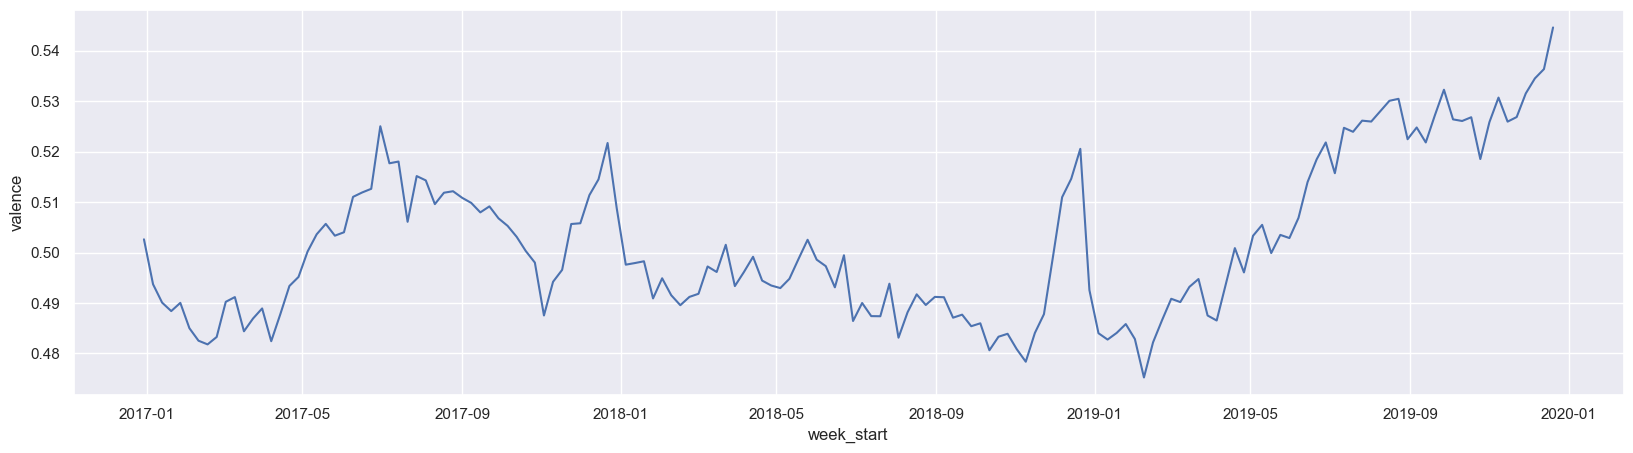

In [15]:
sns.set_theme()
plt.figure(figsize=(20,5))
_ = sns.lineplot(x=weekly_valence.index, y=weekly_valence)

* Πόσο μεγάλη σημασία έχουν τα Χριστούγεννα!

* Και πόσο μελαγχολικός μήνας φαίνεται να είναι ο Φεβρουάριος...

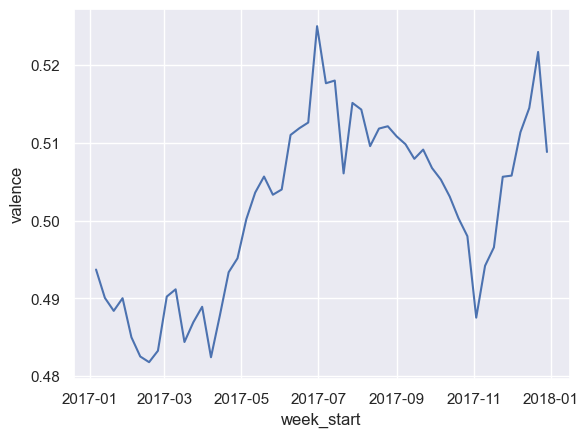

In [16]:
weekly_valence_2017 = weekly_valence[weekly_valence.index.year == 2017]
_ = sns.lineplot(x=weekly_valence_2017.index, y=weekly_valence_2017)

* Το ίδιο βλέπουμε και την επόμενη χρονιά!

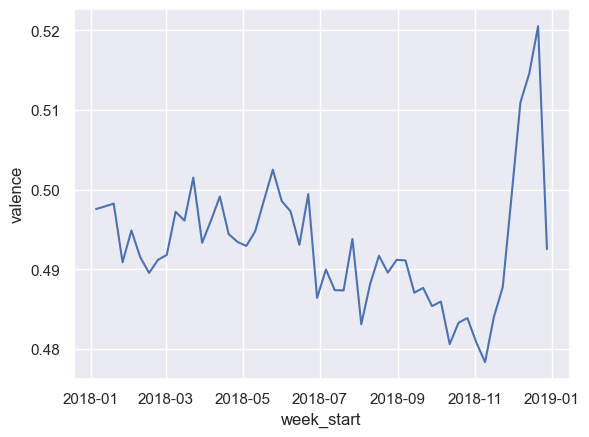

In [17]:
weekly_valence_2018 = weekly_valence[weekly_valence.index.year == 2018]
_ = sns.lineplot(x=weekly_valence_2018.index, y=weekly_valence_2018)

* Αλλά δεν το βλέπουμε το 2019.

* Ο κόσμος φαίνεται να το γλεντούσε γενικώς, προφανώς δεν είχε συναίσθηση τι θα επερχόταν το 2020...

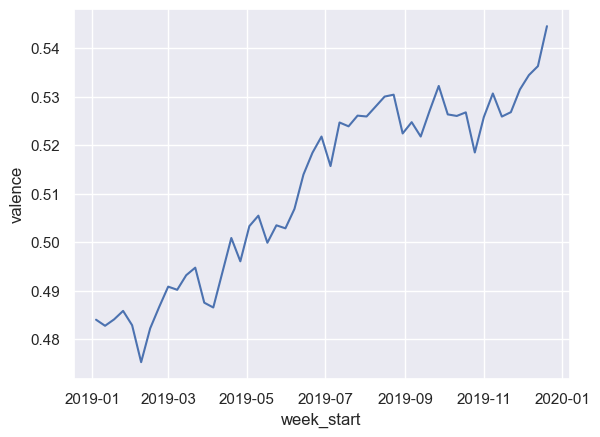

In [18]:
weekly_valence_2019 = weekly_valence[weekly_valence.index.year == 2019]
_ = sns.lineplot(x=weekly_valence_2019.index, y=weekly_valence_2019)

* Γενικότερα πάντως, το σθένος των κομματιών φαίνεται να βρίσκεται προς το μέσο.

<Axes: xlabel='valence', ylabel='Count'>

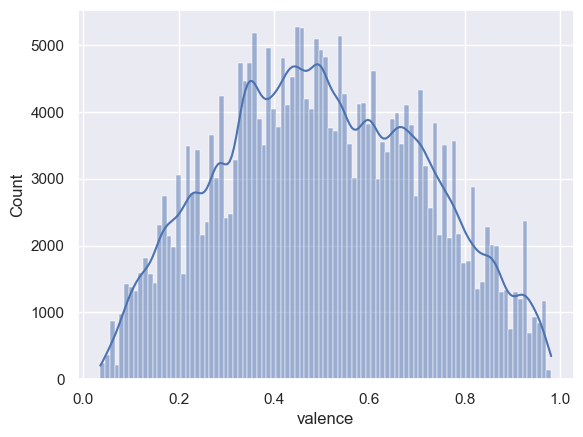

In [19]:
sns.histplot(x='valence', data=all_charts, kde=True)

* Μπορούμε να δούμε την εικόνα σε μία συγκεκριμένη περιοχή, όπως στις ΗΠΑ:

<Axes: xlabel='valence', ylabel='Count'>

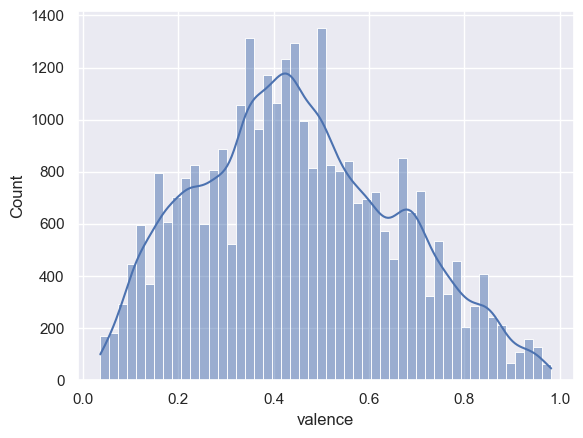

In [20]:
sns.histplot(x='valence', data=all_charts[all_charts['region'] == 'us'], kde=True)

* Ή στη Βραζιλία:

<Axes: xlabel='valence', ylabel='Count'>

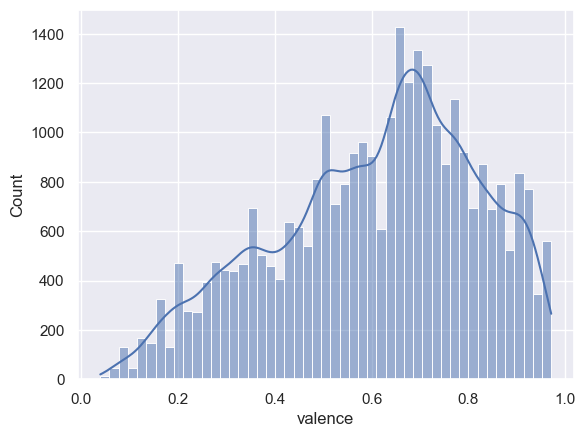

In [21]:
sns.histplot(x='valence', data=all_charts[all_charts['region'] == 'br'], kde=True)

* Ή σε όλες τις περιοχές μαζί:

<Figure size 1600x1000 with 0 Axes>

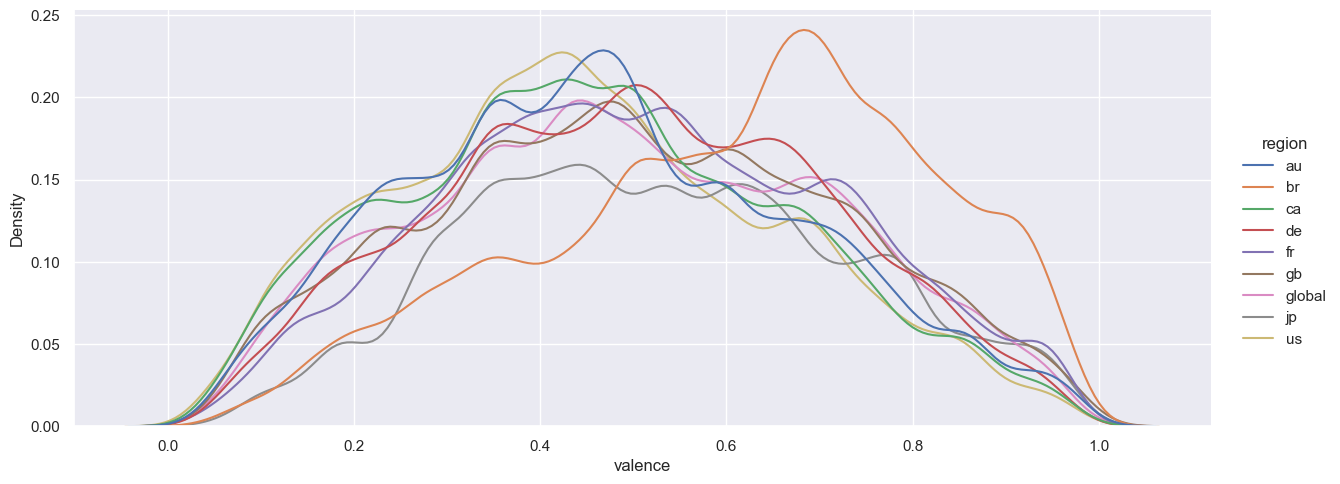

In [22]:
plt.figure(figsize=(16, 10))
_ = sns.displot(x="valence", data=all_charts, hue="region", aspect=2.5, kind="kde")

* Ή στις ΗΠΑ, Βραζιλία, και σε όλον τον κόσμο:

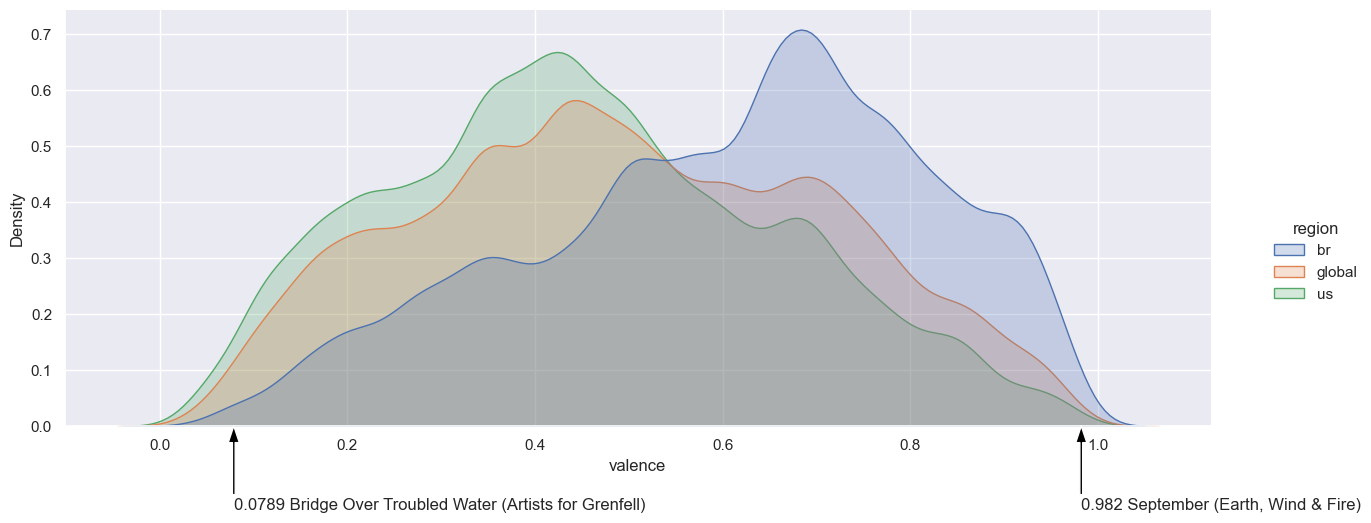

In [23]:
g = sns.displot(x="valence", data=all_charts[all_charts['region'].isin(['br', 'us', 'global'])], 
                hue="region", aspect=2.5, kind="kde", fill=True)
g.ax.annotate('0.0789 Bridge Over Troubled Water (Artists for Grenfell)', 
              xy=(0.0789, 0.0), 
              xytext=(0.0789, -0.15), 
              arrowprops=dict(facecolor='black', headwidth=8, width=2),
)
_ = g.ax.annotate('0.982 September (Earth, Wind & Fire)', xy=(0.982, 0.0), 
                  xytext=(0.982, -0.15),
                  arrowprops=dict(facecolor='black', headwidth=8, width=2))

* Τα θηκογράμματα μπορούν να μας δείξουν το μέγεθος της διαφοράς ανά περιοχή:

<Axes: xlabel='region', ylabel='valence'>

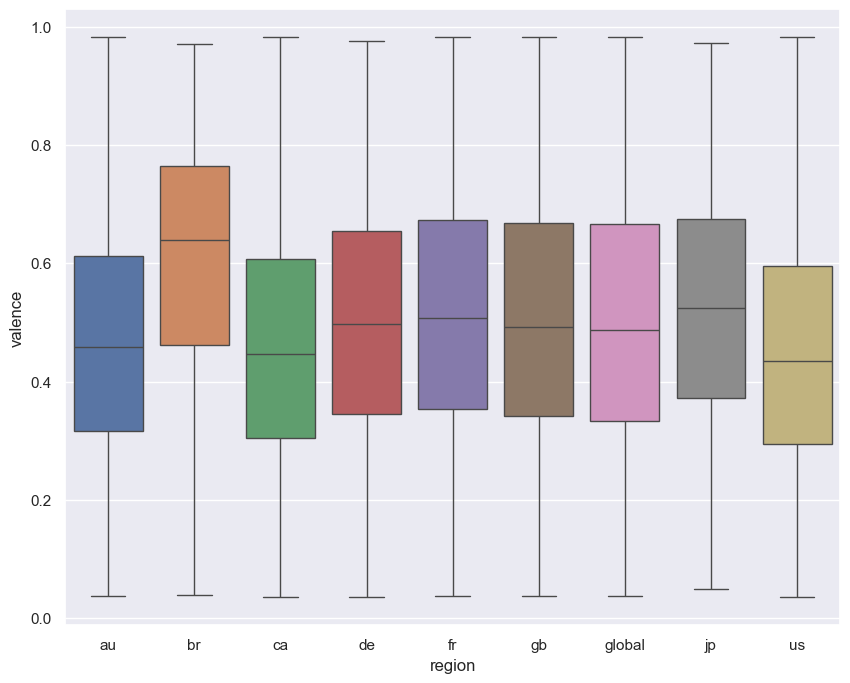

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='region', y='valence', hue='region', data=all_charts)

* Μια ιδέα είναι να βάλουμε όλα τα ιστογράμματα σε ένα διάγραμμα, αλλά με έναν καλύτερο τρόπο.

* Θα ξεκινήσουμε παίρνοντας το μέσο σθένος σε αύξουσα σειρά.

In [25]:
valence_by_region = all_charts[['region', 'valence']].groupby('region').mean().sort_values(by='valence')
valence_by_region.reset_index(inplace=True)
valence_by_region['region_valence_pos'] = valence_by_region.index
valence_by_region

,region,valence,region_valence_pos
0,us,0.450260,0
1,ca,0.459246,1
2,au,0.469907,2
3,global,0.495200,3
4,de,0.499083,4
5,gb,0.501652,5
6,fr,0.510743,6
7,jp,0.529289,7
8,br,0.606865,8


* Θα προσθέσουμε τη θέση κάθε περιοχής, ως προς το σθένος, στο `DataFrame` `all_charts`.

In [26]:
all_charts = pd.merge(all_charts, valence_by_region[['region', 'region_valence_pos']], on='region')
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region,valence,region_valence_pos
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au,0.5350,2
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au,0.7420,2
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au,0.6610,2
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au,0.0862,2
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au,0.7170,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273595,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us,0.4840,0
273596,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us,0.6050,0
273597,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us,0.4010,0
273598,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us,0.6710,0


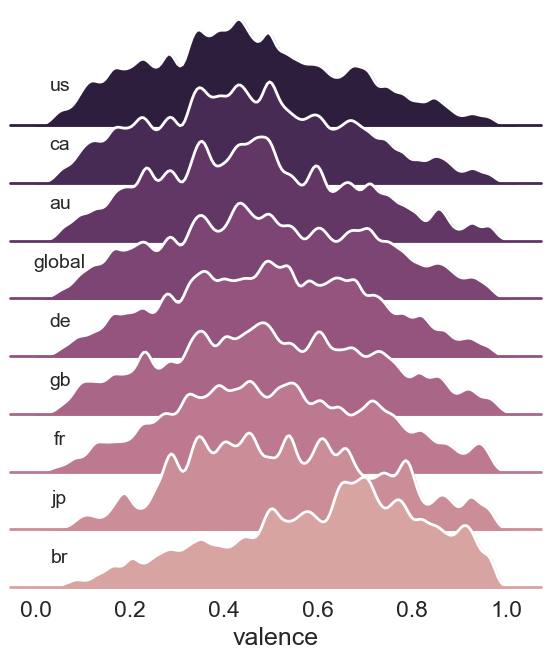

In [27]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)
pal = sns.cubehelix_palette(len(valence_by_region), rot=.45, light=.7, reverse=True)
g = sns.FacetGrid(all_charts, 
                  row='region', 
                  hue='region_valence_pos',
                  row_order=valence_by_region['region'],
                  height=0.8, aspect=8,
                  palette=pal)
g.map(sns.kdeplot, "valence",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "valence", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
for i, region in enumerate(reversed(valence_by_region['region'])):
    plt.text(0.05, 0.5 + 1.2*i, region,
             horizontalalignment='center',
             fontsize=14)

* Είναι φανερό ότι το σθένος διαφέρει από περιοχή σε περιοχή.

* Αλλά οι διαφορές αυτές είναι στατιστικά σημαντικές;

* Για να το διελευκάνουμε αυτό θα χρησιμοποιήσουμε την Ανάλυση Διακύμανσης (Analysis of Variance, ANOVA).

* Στην ANOVA ελέγχουμε τη διακύμανση εντός των ομάδων σε σχέση με τη διακύμανση μεταξύ των ομάδων των δεδομένων μας.

* Αν η διακύμανση μεταξύ των ομάδων είναι μεγάλη σε σχέση με τη διακύμανση εντός των ομάδων, τότε δεν είναι πιθανό οι διαφορές στις μέσες τιμές να είναι απλώς προϊόν τύχης.

* Για να χρησιμοιήσουμε ANOVA πρέπει να πληρούνται κάποιες συνθήκες.

* Μια συνθήκη είναι ότι τα δεδομένα σε κάθε ομάδα πρέπει να ακολουθούν την κανονική κατανομή.

* Για να το ελέγξουμε αυτό κατασκευάζουμε κατ΄ αρχήν ιστογράμματα για κάθε ομάδα, δηλαδή περιοχή.

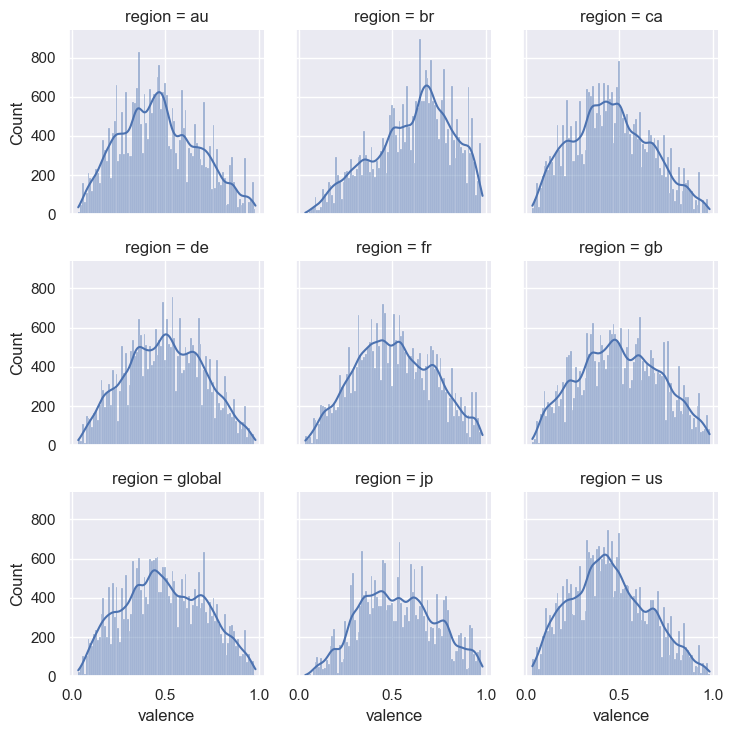

In [28]:
sns.set_theme()
_ = sns.displot(all_charts, kde=True,
    x="valence", col="region", col_wrap=3, height=2.5, facet_kws=dict(margin_titles=True),
)

* Προχωράμε στην κατασκευή διαγραμμάτων QQ, ένα ανά περιοχή.

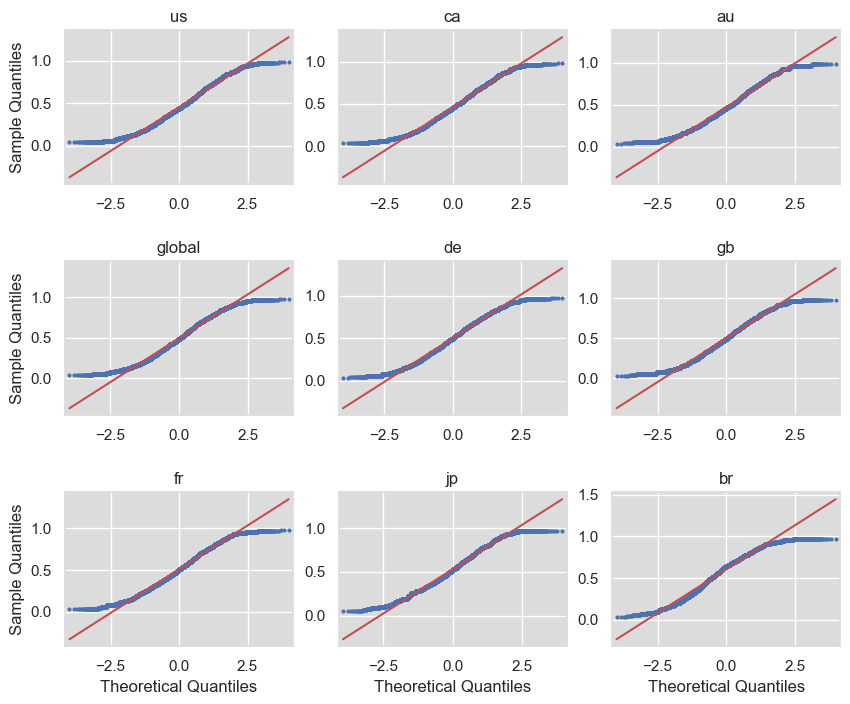

In [29]:
fig = plt.figure(figsize=(10, 8))
plt.rc('axes', edgecolor='gainsboro')
plt.subplots_adjust(hspace=.5)
for i, region in enumerate(valence_by_region['region']):
    ax = fig.add_subplot(3, 3, (i+1))
    ax.set_facecolor('gainsboro')
    ax.grid('on', color='w')
    sm.graphics.qqplot(all_charts.loc[all_charts['region'] == region, 'valence'], 
                       line='s', ax=ax, linewidth=1, markersize=2)
    if i < 6:
        plt.xlabel("")
    if i % 3 != 0:
        plt.ylabel("")
    plt.title(region)

* Μία άλλη συνθήκη που πρέπει να πληρούν τα δεδομένα είναι οι ομάδες να έχουν την ίδια διακύμανση.

* Αυτό μπορούμε να το ελέγξουμε άμεσα.

In [28]:
all_charts[['region', 'valence']].groupby('region').var()

,valence
region,
au,0.043605
br,0.044167
ca,0.043119
de,0.042372
fr,0.044115
gb,0.047712
global,0.046959
jp,0.041303
us,0.042453


* Έχοντας διαπιστώσει τα παραπάνω, προχωράμε στην ANOVA.

* Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση `f_oneway()` της βιβλιοθήκης SciPy.

* Η συνάρτηση αυτή παίρνει σαν παραμέτρους τις ομάδες που θέλουμε να συγκρίνουμε.

* Θα πρέπει να διαχειριστούμε λίγο τα δεδομένα μας πρώτα ώστε να έχουμε έναν πίνακα-γραμμή για κάθε ομάδα.

* Ξεκινάμε βάζοντας το σθένος κάθε κομματιού σε μία ξεχωριστή στήλη ανά περιοχή.

In [30]:
region_valence = all_charts.pivot_table(values='valence', 
                                        index=all_charts.index, 
                                        columns='region', 
                                        aggfunc='first')
region_valence

region,au,br,ca,de,fr,gb,global,jp,us
0,0.5350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.7420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.7170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
273595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484
273596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605
273597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401
273598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671


* Σπάμε το `DataFrame` στις επιμέρους στήλες ώστε να πάρουμε μονοδιάστατους πίνακες.

In [31]:
region_valence_groups = np.split(region_valence.values, region_valence.shape[1], axis=1)
for rvc in region_valence_groups:
    print(rvc.shape)

(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)
(273600, 1)


* Ξέρουμε ότι υπάρχουν`NaN`, οπότε τα καθαρίζουμε.

In [32]:
region_valence_groups = [ c[~np.isnan(c)] for c in region_valence_groups ]
for rvc in region_valence_groups:
    print(rvc.shape, rvc)

(31200,) [0.535 0.742 0.661 ... 0.732 0.196 0.244]
(31200,) [0.864 0.461 0.661 ... 0.924 0.434 0.203]
(31200,) [0.535 0.613 0.661 ... 0.12  0.693 0.329]
(31200,) [0.742 0.157 0.714 ... 0.639 0.572 0.843]
(31200,) [0.371 0.535 0.319 ... 0.802 0.804 0.299]
(31200,) [0.742 0.535 0.551 ... 0.234 0.388 0.323]
(30800,) [0.535 0.661 0.742 ... 0.321 0.939 0.374]
(24400,) [0.497 0.931 0.261 ... 0.544 0.405 0.344]
(31200,) [0.168 0.613 0.535 ... 0.401 0.671 0.567]


* Τώρα μπορούμε να δώσουμε τις ομάδες στη συνάρτηση `f_oneway()`.

* Βλέπουμε ότι η τιμή της μετρικής F είναι υψηλή, άρα οι διαφορές στις μέσες τιμές του σθένους είναι απίθανο να οφείλονται στην τύχη.

In [33]:
stats.f_oneway(*region_valence_groups)

F_onewayResult(statistic=np.float64(1527.0698311350407), pvalue=np.float64(0.0))

* ANOVA μπορούμε να χρησιμοποιήσουμε και δημιουργώντας ένα γραμμικό μοντέλο με το statsmodels (όπως όταν κάνουμε παλινδρόμηση).

* Στην πραγματικότητα αυτό είναι πιο εύκολο από την `f_oneway()` καθώς δεν χρειάζεται να προσαρμόσουμε τα δεδομένα μας καθόλου.

In [34]:
region_valence_mod = smf.ols('valence ~ C(region)', data=all_charts)
region_valence_res = region_valence_mod.fit()

* Από το γραμμικό μοντέλο μπορούμε να πάρουμε τον πίνακα ANOVA χρησιμοποιώντας τη συνάρτηση `anova_lm()`.

* Αυτή μας δίνει μια πιο πλήρη εικόνα των αποτελεσμάτων.

In [35]:
anova_table = sm.stats.anova_lm(region_valence_res)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Πώς ερμηνεύεται ο πίνακας;

* Να θυμηθούμε ότι στην ANOVA θέλουμε να συγκρίνουμε τη διακύμανση εντός των ομάδων σε σχέση με τη διακύμανση μεταξύ των ομάδων.

* Για να εκτιμήσουμε τη διακύμανση μεταξύ των ομάδων, ξεκινάμε υπολογίζοντας το άθροισμα των τετραγώνων της διαφοράς του μέσου όρου κάθε ομάδας $i$ από τον γενικό μέσο όρο:

$$ (\bar{x_i} - \bar{x})^2 $$

* Στη συνέχεια πολλαπλασιάζουμε κάθε άθροισμα με το πλήθος των στοιχείων κάθε ομάδας:

$$ n_i(\bar{x_i} - \bar{x})^2 $$

* Κατόπιν προσθέτουμε τα αθροίσματα για όλες τις ομάδες μας, έστω $k$:

$$ \sum_{i=1}^{k} n_i(\bar{x_i} - \bar{x})^2 $$

* Αυτό εμφανίζεται στη στήλη `sum_sq` στην πρώτη γραμμή του πίνακα ANOVA και ονομάζεται *άθροισμα τετραγώνων μεταξύ ομάδων* (between groups sum of squares).

In [36]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Διαιρούμε το `sum_sq` που έχουμε βρει με τους αντίστοιχους *βαθμούς ελευθερίας*.

* Οι βαθμοί ελευθερίας μετρούν πόσες από τις οντότητες που χειριζόμαστε είναι ελεύθερες ή ανεξάρτητες μεταξύ τους.

* Εδώ εργαζόμαστε με τους μέσους όρους των ομάδων και το γενικό μέσο όρο.

* Αν έχουμε $k$ ομάδες και ξέρουμε τους μέσους  όρους $k - 1$ oμάδων και το γενικό μέσο όρο, από αυτούς μπορούμε να βρούμε και τον άλλο μέσο όρο που δεν ξέρουμε. 

* Άρα για $k$ ομάδες $k-1$ μέσοι όροι μπορούν να μεταβάλλονται ελεύθερα. Ο άλλος μέσος όρος προκύπτει από τους $k-1$ και το γενικό όσο όρο.

* Έτσι για $k$ ομάδες έχουμε $k - 1$ βαθμούς ελευθερίας.

* Αυτό εμφανίζεται τη στήλη `df` στην πρώτη γραμμή του πίνακα ANOVA.

In [37]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Διαιρούμε το `sum_sq` με το `df` στην πρώτη γραμμή, οπότε παίρνουμε το μέσο άθροισμα των τετραγώνων, `mean_sq`.

* To `mean_sq` στην πρώτη γραμμή είναι η εκτίμηση για τη διακύμανση μεταξύ των ομάδων.

In [38]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Προχωράμε στη διακύμανση εντός των ομάδων.

* Για να την εκτιμήσουμε, ξεκινάμε με τα τετράγωνα της διαφοράς κάθε παρατήρησης $j$ από κάθε ομάδα $i$, $x_{ij}$, από το μέσο όρο της ομάδας.

$$ (x_{ij} - \bar{x_i})^2 $$

* Στη συνέχεια προσθέτουμε τα τετράγωνα:

$$ \sum_{i=1}^{k}\sum_{j=1}^{n_i} (x_{ij} - \bar{x_i})^2 $$


* Αυτό εμφανίζεται στη στήλη `sum_sq` στη δεύτερη γραμμή του πίνακα ANOVA και ονομάζεται *άθροισμα τετραγώνων εντός των ομάδων* (inside groups sum of squares).

In [39]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Διαιρούμε το εντός των ομάδων `sum_sq` πάλι με τους αντίστοιχους βαθμούς ελευθερίας.

* Σε κάθε ομάδα, κάθε παρατήρηση μπορεί να προκύψει από τις υπόλοιπες παρατηρήσεις και το μέσο όρο, επομένως οι βαθμοί ελευθερίας κάθε ομάδας είναι $n_i - 1$.

* Άρα αν έχουμε $k$ ομάδες, οι βαθμοί ελευθερίας εντός των ομάδων είναι $n - k$, όπου $n$ είναι το συνολικό πλήθος των παρατηρήσεών μας.

* Αυτό εμφανίζεται τη στήλη `df` στη δεύτερη γραμμή του πίνακα ANOVA.

In [40]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Διαιρούμε το `sum_sq` με το `df` στη δεύτερη γραμμή, οπότε παίρνουμε το μέσο άθροισμα των τετραγώνων, `mean_sq`.

* To `mean_sq` στη δεύτερη γραμμή είναι η εκτίμηση για τη διακύμανση εντός των ομάδων.

In [41]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN


* Η μετρική `F` στην τέταρτη στήλη είναι ο λόγος του `mean_sq` της πρώτης γραμμής με το `mean_sq` της δεύτερης γραμμής.

In [42]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(region),8.0,538.023297,67.252912,1527.069831,0.0
Residual,273591.0,12049.083226,0.044040,NaN,NaN
